# Assignment_7 HKD_Airlines

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [54]:
import pandas as pd
xlsx = pd.ExcelFile('D:\\Data Science\\Assignments\\EastWestAirlines.xlsx')
df = pd.read_excel(xlsx, 'Airline')
#df1 = pd.read_excel(xlsx, 'Description')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [55]:
# Check data type and null values exists or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [56]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [57]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [58]:
df.isna().sum() # No Null values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [59]:
#print(df["ID#"].unique())
#print(df["Balance"].unique())
#print(df["Qual_miles"].unique())
#print(df["cc1_miles"].unique())
#print(df["cc2_miles"].unique())
#print(df["cc3_miles"].unique())
#print(df["Bonus_miles"].unique())
#print(df["Bonus_trans"].unique())
#print(df["Flight_miles_12mo"].unique())
#print(df["Flight_trans_12"].unique())
#print(df["Days_since_enroll"].unique())
df["Award?"].unique()

array([0, 1], dtype=int64)

In [60]:
df.shape

(3999, 12)

In [61]:
df[df.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [62]:
# Correlation between columns
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

# Hierarchy Clustering

In [64]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [65]:
# Normalization Function 
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [66]:
# Normalize data frame (Considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


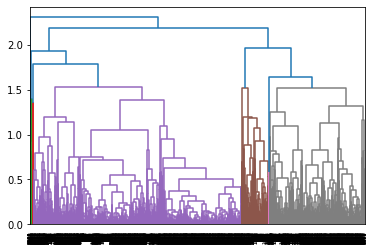

In [67]:
# Create Dendrogram
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [68]:
# Create Clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [69]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [70]:
# Save cluster for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [71]:
df['h_clusterid'] = y_hc
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [72]:
df1 = df.sort_values("h_clusterid")
df1.iloc[:,[0,-1]]

,ID#,h_clusterid
0,1,0
2485,2504,0
2487,2506,0
2488,2507,0
2491,2510,0
...,...,...
940,951,4
3959,3982,4
3779,3802,4
1389,1403,4


In [105]:
x = df.iloc[:,-1]
y = df1.iloc[:, -2]

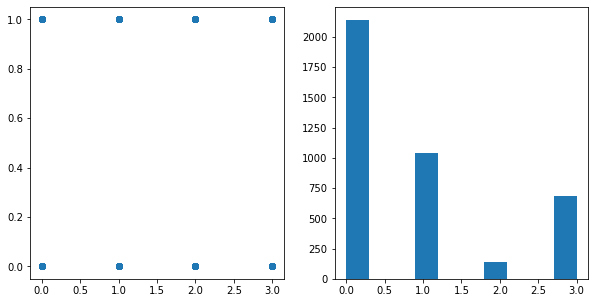

In [108]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax[0].scatter(x, y)
ax[1].hist(x)
plt.show()

# K_Means Clustering

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [76]:
# Standardization of data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -7.30291870e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -7.30291870e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -7.30291870e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  1.39443508e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01, -7.30291870e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01, -7.30291870e-01]])

In [77]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_df)
kmeans.inertia_

29398.01058346419

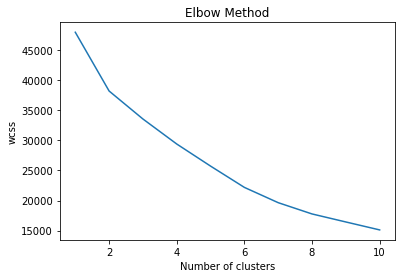

In [78]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [79]:
wcss

[47987.999999999985,
 38211.12466951978,
 33558.87513808704,
 29398.010583464194,
 25724.311049571956,
 22182.6574108476,
 19641.31723938554,
 17767.343981935242,
 16433.35105121742,
 15110.871518427066]

In [80]:
# Build Cluster Algorithm
cluster_new = KMeans(4, random_state = 42)
cluster_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [81]:
cluster_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [82]:
# Assign Cluster to the dataset
df['clusterid_new'] = cluster_new.labels_
cluster_new.cluster_centers_  # these are standardized value

array([[-0.28296685, -0.07459285, -0.51140363, -0.09824189, -0.060374  ,
        -0.49464343, -0.43536104, -0.21048576, -0.23150553, -0.22077758,
        -0.7669193 , -0.73029187],
       [-0.11898452,  0.01796365, -0.02570087,  0.24828443, -0.06276658,
        -0.09264573,  0.04829277, -0.04252018, -0.03640473,  0.061751  ,
         1.25394621,  1.45596192],
       [ 1.28268449,  0.979096  ,  0.16884431,  0.09952771, -0.06276658,
         0.72587331,  1.80724874,  3.84281759,  4.1336012 ,  0.2711156 ,
         0.98649052,  0.83611267],
       [ 0.80784264,  0.01015591,  1.60351768, -0.08835341,  0.29618383,
         1.54097507,  0.92625342, -0.04637238, -0.04807989,  0.54243493,
         0.30326531, -0.0866702 ]])

In [83]:
df.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2256.573097,45088.720691,86.411957,1.355441,1.000000,1.000467,5200.222326,7.421298,165.368519,0.495563,3662.680990,0.000000,0.000000
1,1,1960.337512,61592.021215,157.858245,2.026037,1.051109,1.000000,14930.500482,12.080039,400.525554,1.236258,4246.302797,0.975892,2.057859
2,2,1743.043796,202848.547445,901.510949,2.291971,1.029197,1.000000,34673.197080,28.956204,5840.131387,17.051095,4678.379562,0.846715,1.474453
3,3,1395.135965,155168.978070,152.192982,4.267544,1.001462,1.070175,54379.250000,20.486842,395.125731,1.190058,5239.714912,0.516082,0.603801


In [102]:
df[df['clusterid_new'] == 3]
#df[df['clusterid_new'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,0,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1,3
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,1,3
3886,3909,84979,0,4,1,1,36702,16,0,0,1600,0,0,3
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,0,3
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,0,3


# DBSCAN : Density Base Scan

In [85]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [86]:
array = df.values

In [87]:
st_scaler = StandardScaler()
X = st_scaler.fit_transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00,  1.39443508e+00,  1.43487685e-01],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01, -7.30291870e-01, -7.58724978e-01]])

In [88]:
dbscan = DBSCAN(eps = 5 , min_samples = 6)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=6)

In [89]:
# Noisy Samples are given the label: -1
print(dbscan.labels_)

[0 0 0 ... 0 0 0]


In [90]:
cl = pd.DataFrame(dbscan.labels_, columns = ['clusters'])

In [91]:
cl

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [92]:
clustered = pd.concat([df,cl], axis =1)
clustered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0,0


In [93]:
# -1 Shows outlier / extreme values for the dataset
clustered[clustered['clusters'] == -1].head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid_new,clusters
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,0,3,-1
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,1,2,-1
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,2,2,-1
343,348,112501,0,1,1,2,19140,11,0,0,7101,0,0,0,-1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,1,3,-1


In [94]:
clustered.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
h_clusterid              0.687422
clusterid_new            0.840960
clusters                 0.010003
dtype: float64

In [95]:
p = clustered.iloc[:,-1]
q = clustered.iloc[:,-2]
r = clustered.iloc[:,-3]
#print(p)
#print(q)
#print(r)

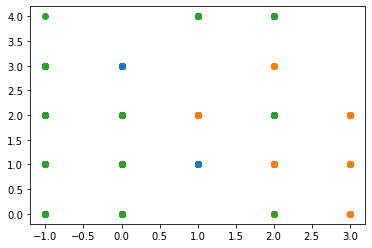

In [96]:
plt.scatter(p,q)
plt.scatter(q,r)
plt.scatter(p,r)
plt.show()

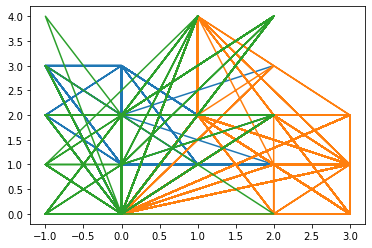

In [97]:
plt.plot(p,q)
plt.plot(q,r)
plt.plot(p,r)
plt.show()

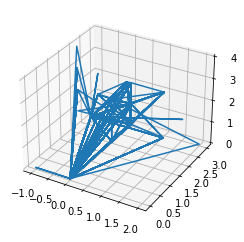

In [98]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(p,q,r)
plt.show()

# Inferences:

In [99]:
# In clusters column there is outiers/extreme values exists in the given data shows with -1.